In [16]:
import tensorflow as tf
import keras

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,BatchNormalization,Dropout,LayerNormalization,\
Conv2D

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import cv2


In [93]:
class_labels = ["Man","Woman"]

# Data Preprocessing

In [19]:
data_path='dataset/train'
categories=os.listdir(data_path)

In [20]:
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels))#empty directory
print(label_dict)
print(categories)
print(labels)

{'man': 0, 'woman': 1}
['man', 'woman']
[0, 1]


In [21]:
img_size=128
data=[]
target=[]
for category in categories:
    folder_path=os.path.join(data_path,category)
    img_name=os.listdir(folder_path)
    
    for img in img_name:
        img_path=os.path.join(folder_path,img)
        img=cv2.imread(img_path)
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            #converting the image into grayscale
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and label(categorized) into list(dataset)
        except Exception as e:
            print("exception",e)
    

In [22]:
data=np.array(data)/255.
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils
new_target=np_utils.to_categorical(target)


In [23]:
np.save('data',data)
np.save('target',new_target)

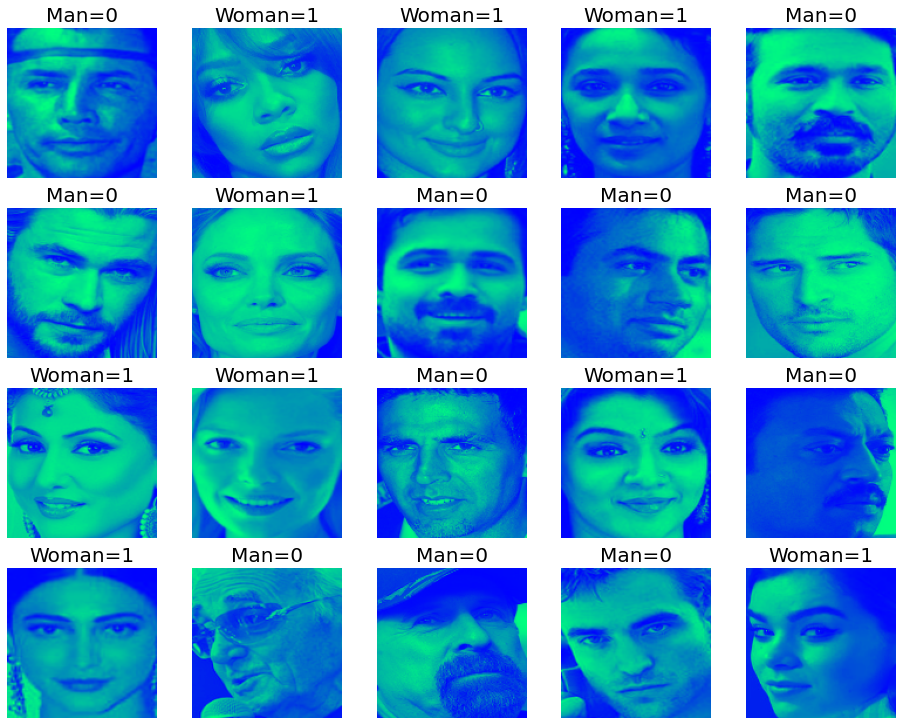

In [100]:
plt.figure(figsize=(16,16))
for i in range(20):
    plt.subplot(5,5,i+1) #5X5 matrix and position the image
    plt.imshow(cv2.resize(xtrain[i],(img_size,img_size)),cmap='winter')
    plt.axis('off')
    plt.title(class_labels[ytrain[i]]+"="+str(ytrain[i]),fontsize=20) #put the class label list and imge name pick by index

# Convolution Neural Network Architecture

In [24]:
classifier=Sequential([
    Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=data.shape[1:]),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(264,activation='relu'),
    Dropout(0.3),
    Dense(1,activation='sigmoid')
      
    
])

In [25]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        3

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(data,target,test_size=0.25,random_state=0)

In [29]:
from keras.callbacks import ModelCheckpoint
checkpoint=ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',save_best_only=True,mode='auto',verbose=0)

In [30]:
history=classifier.fit(xtrain,ytrain,epochs=50,callbacks=[checkpoint],validation_split=0.2)

Train on 960 samples, validate on 240 samples
Epoch 1/50
896/960 [===========================>..] - ETA: 0s - loss: 0.7796 - accuracy: 0.5614WARNING:tensorflow:From C:\Users\princ\Anaconda2\envs\tf_gpu\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1781: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model-001.model\assets
960/960 [==============================] - 4s 4ms/sample - loss: 0.7734 - accuracy: 0.5552 - val_loss: 0.6726 - val_accuracy: 0.5750
Epoch 2/50
960/960 [==============================] - 3s 3ms/sample - loss: 0.6080 - accuracy: 0.6833 - val_loss: 0.5980 - val_accuracy: 0.7333
Epoch 3/50
960/960 [==============================] - 3s 3ms/sample - loss: 0.5082 - accuracy: 0.7646 - val_loss: 0.4626 - val_accuracy: 0.7958
Ep

Epoch 42/50
960/960 [==============================] - 1s 1ms/sample - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.2618 - val_accuracy: 0.9417
Epoch 43/50
960/960 [==============================] - 1s 1ms/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.2701 - val_accuracy: 0.9292
Epoch 44/50
960/960 [==============================] - 1s 1ms/sample - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.2441 - val_accuracy: 0.9292
Epoch 45/50
960/960 [==============================] - 1s 1ms/sample - loss: 0.0055 - accuracy: 0.9979 - val_loss: 0.3256 - val_accuracy: 0.9167
Epoch 46/50
960/960 [==============================] - 1s 1ms/sample - loss: 0.0189 - accuracy: 0.9906 - val_loss: 0.5660 - val_accuracy: 0.8708
Epoch 47/50
960/960 [==============================] - 1s 1ms/sample - loss: 0.0312 - accuracy: 0.9906 - val_loss: 0.3867 - val_accuracy: 0.8792
Epoch 48/50
960/960 [==============================] - 1s 1ms/sample - loss: 0.0077 - accuracy: 0.9979 - val_loss: 0.3762 - val_ac

In [31]:
classifier.save('detectfacemodel.h5')


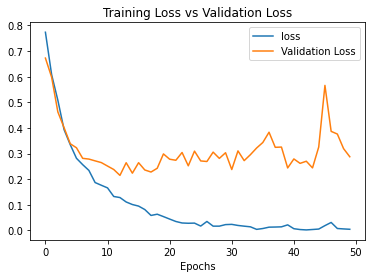

In [35]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.show()

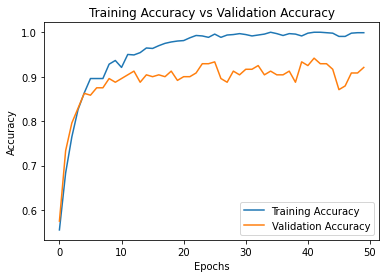

In [34]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()
plt.show()

In [37]:
classifier.evaluate(xtest,ytest,verbose=0)[1]*100

91.50000214576721

# Detect faces by haarcascade classifier

In [38]:
model=tf.keras.models.load_model('detectfacemodel.h5')
face_clasfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#source=cv2.VideoCapture(0)
color_dict={0:(0,255,0),1:(0,0,255)}
labels_dict={
    0:'man',
    1:'Woman'
}

In [39]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

In [63]:
ypred=classifier.predict(xtest)

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [77]:
accuracy_score(ytest,ypred.round())*100

91.5

In [78]:
print(classification_report(ytest,ypred.round()))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       205
           1       0.89      0.95      0.92       195

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.91       400
weighted avg       0.92      0.92      0.91       400



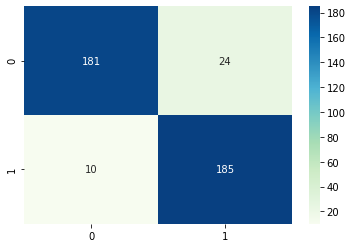

In [82]:
cm=confusion_matrix(ytest,ypred.round())
sns.heatmap(cm,annot=True,cmap='GnBu',fmt='d')

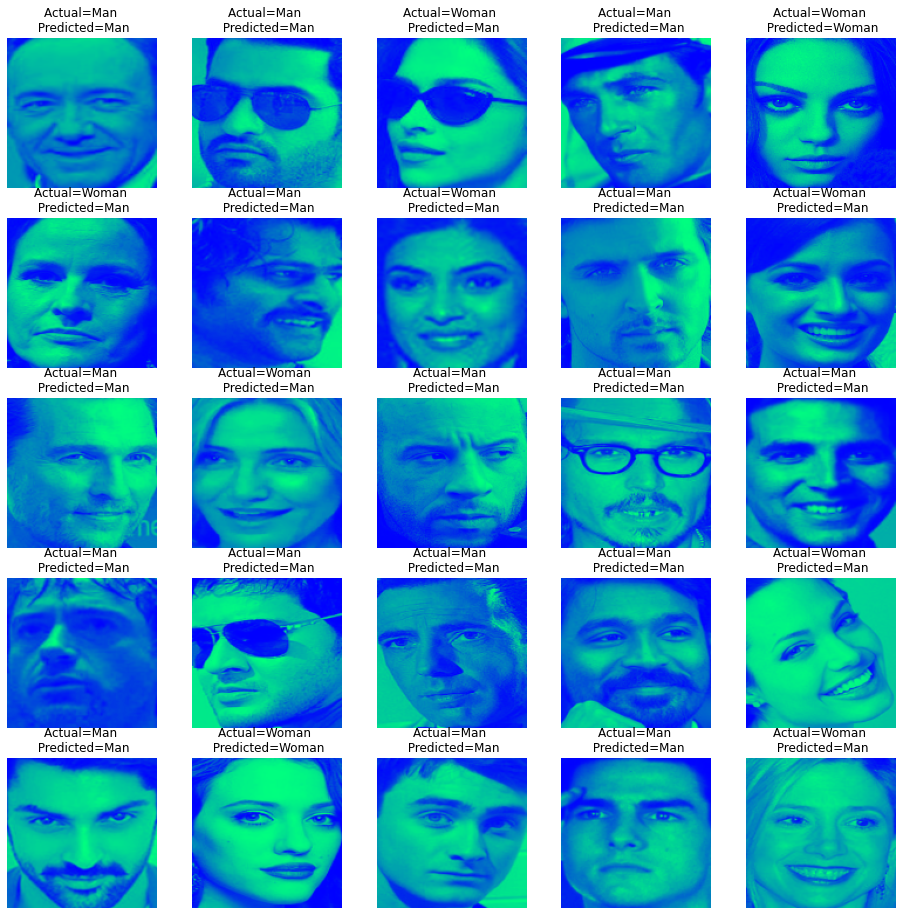

In [96]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,340,25):
    plt.subplot(5,5,j);j+=1 #5X5 matrix and position the image
    plt.imshow(xtest[i].reshape(128,128),cmap='winter')
    plt.axis('off')
    plt.title('Actual={} \n Predicted={}'.format(class_labels[ytest[i]],class_labels[np.int(ypred[i])]))

# Prediction by picture

In [10]:
img=cv2.imread('_949130d6-c17f-11ea-a85c-8ff81cd7ae5a.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(img,scaleFactor=1.1,minNeighbors=5,minSize=(30, 30))
print('No.of Persons={}'.format(len(faces)))
for (x,y,w,h) in faces:
    face_img=gray[y:y+w,x:x+w]
    resized=cv2.resize(face_img,(128,128))
    normalized=resized/255.0
    reshaped=np.reshape(normalized,(1,128,128,1))
    result=model.predict_classes(reshaped)
    label=np.argmax(result,axis=1)[0]
    cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
    cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
    cv2.putText(img, labels_dict[result[0][0]], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        

#img= cv2.resize(img, (960,540))
cv2.imshow('Gender Detector',img)
key = cv2.waitKey(0)
cv2.destroyAllWindows()





No.of Persons=3


# Prediction by live web cam

In [12]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

model = load_model('detectfacemodel.h5')
face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source = cv2.VideoCapture(0)

labels_dict = { 
    0: 'man',
    1 : 'woman',
}


while(True):

    ret,img = source.read()
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_clsfr.detectMultiScale(img,1.3,5)  

    for x,y,w,h in faces:
        resized = img[y:y+h,x:x+w]
        resized = cv2.resize(resized,(128,128))
        resized = image.img_to_array(resized)
        resized = np.expand_dims(resized,axis=0)
        normalized = resized / 255.0
        result = model.predict_classes(normalized) 
        #print('predicted value', result[0])
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        #cv2.putText(
        #  img, labels_dict[result[0][0]], 
        #  (x, y-10),
        #  cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        label=np.argmax(result,axis=1)[0]
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[result[0][0]], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
    
    
    cv2.imshow('LIVE',img)
    key = cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()